In [1]:
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, date, time
import pandas as pd

C:\Users\allen\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [2]:
paperId_and_info_and_date_Seed = pd.read_csv('paperId_and_info_and_date_Seed.csv')
paperId_and_info_and_date_Seed

,ToNodeId,Title,Authors,Date,Seed
0,9912289,Gauge Fixing in the Chain by Chain Method,A Shirzad and F Loran,1999-12-10,78d95058cd29c47f30a6cda6d326f89148d75705168ece...
1,9412202,"Conformal, Integrable and Topological Theories...",A. A. Abrikosov Jr,1994-12-01,2115ebc5c278cedb1a521a256a134915a833d516825ea1...
2,9412201,The Problem of Ground State in Thermo-Field Dy...,A. A. Abrikosov Jr,1994-12-01,2115ebc5c278cedb1a521a256a134915a833d516825ea1...
3,9806220,Dynamical Lorentz simmetry breaking from 3+1 A...,"A. A. Andrianov, R. Soldati, L. Sorbo",1998-06-02,3e57458efddb66c83d9ad7e9b3b7f47c002cbcd5161731...
4,9911246,Magnetic Interactions of D-branes and Wess-Zum...,"A. A. Tseytlin, K. Zarembo",1999-11-04,d7afc84280588842e043c9e453d5dcb15804567d96f073...
...,...,...,...,...,...
1732,9812254,Theory of Stochastic Space-Time. 1. Gravitatio...,"Zahid Zakir (Institute of Noosphere,Tashkent, ...",1998-12-04,aaed2e86214195c2a43150d0e6a4e288976f826ed59325...
1733,9605221,Three-Family $SO(10)$ Grand Unification in Str...,Zurab Kakushadze and S.-H. Henry Tye,1996-05-03,c410b9227d5f00b3b431f040735a9c60a8ab1e03f38ea4...
1734,9709214,Soliton Solutions of M-theory on an Orbifold,"Zygmunt Lalak (ITP Warsaw), Andre' Lukas (UPen...",1997-09-02,a47fcc6a52dca2ace234856a2f652c73c3085bde545c79...
1735,9707223,"Gaugino Condensation, Moduli Potentials and Su...",Zygmunt Lalak and Steven Thomas,1997-07-02,9f66b6f46a9adaebd9f69738418dbea1b9b3c2b7393138...


In [15]:
len(paperId_and_info_and_date_Seed.Seed.unique())

1333

In [4]:
paperId_and_info_and_date_Seed[paperId_and_info_and_date_Seed['Seed']=='09be04ef4c0f6dd3183ecac4b90b7529d671ff6f9ae7a1f31369448a049b7dcf']

,ToNodeId,Title,Authors,Date,Seed
530,9812233,Vacuum amplification of the high-frequency ele...,G. A. Vilkovisky (Lebedev Institute),1998-12-02,09be04ef4c0f6dd3183ecac4b90b7529d671ff6f9ae7a1...
531,9906241,The vacuum backreaction on a pair creating source,G. A. Vilkovisky (Lebedev Institute),1999-06-03,09be04ef4c0f6dd3183ecac4b90b7529d671ff6f9ae7a1...


In [16]:
citations_with_data= pd.read_csv('citations(hep-th)_with_Data.csv')
citations_with_data

,FromNodeId,ToNodeId
0,9503222,9310202
1,9312207,9312202
2,9910201,9312206
3,9712226,9312206
4,9807210,9312206
...,...,...
1972,9912250,9912210
1973,9912235,9912219
1974,9912287,9912233
1975,9912278,9912248


In [24]:
AR1 = citations_with_data.FromNodeId.unique()
AR2 = citations_with_data.ToNodeId.unique()

uniqueArticlesCitation = np.concatenate([AR1,AR2])
uniqueArticlesCitation = np.unique(uniqueArticlesCitation)
print(f'Il numero di articoli distinti in citations_with_data è {len(uniqueArticlesCitation)}')

#caricati[caricati['NodeId'].isin(sub_df['ToNodeId'].values)]['msgIdTangle'].values[0] 

Il numero di articoli distinti in citations_with_data è 1066


In [17]:
len(citations_with_data.FromNodeId.unique())

809

In [60]:
len(np.unique(citations_with_data.FromNodeId.values))

809

In [61]:
len(np.unique(citations_with_data.ToNodeId.values))

668

In [18]:
#poiche dal set originale di citazioni sono state tolte quelle che non avevano dati corrispondenti
#in paperId_and_info_and_date_Seed => controlliamo ora quanti sono gli autori distinti
#che hanno scritto gli articoli contenuti in citations_with_data

A1 = paperId_and_info_and_date_Seed[paperId_and_info_and_date_Seed['ToNodeId'].isin(citations_with_data['FromNodeId'].values)]['Authors'].values

A2 = paperId_and_info_and_date_Seed[paperId_and_info_and_date_Seed['ToNodeId'].isin(citations_with_data['ToNodeId'].values)]['Authors'].values


uniqueAuthors = np.concatenate([A1,A2])
uniqueAuthors = np.unique(uniqueAuthors)
print(f'Il numero di autori distinti in citations_with_data è {len(uniqueAuthors)}')

#caricati[caricati['NodeId'].isin(sub_df['ToNodeId'].values)]['msgIdTangle'].values[0] 

Il numero di autori distinti in citations_with_data è 878


In [20]:
#contiene tutti i distinti nodi del grafo (From & To) 
TOPOLOGICAL_SORT_df= pd.read_csv('TOPOLOGICAL_SORT_df.csv')

TOPOLOGICAL_SORT_df

,0
0,9912293
1,9912292
2,9912290
3,9912287
4,9912285
...,...
1061,9312208
1062,9312207
1063,9312206
1064,9312202


In [223]:
frontiera = []

for i in range(len(citations_with_data)):
    if(citations_with_data.iloc[i]['ToNodeId']not in citations_with_data['FromNodeId'].values):
        frontiera.append(citations_with_data.iloc[i]['ToNodeId'])

frontiera = np.unique(frontiera)
print(len(frontiera))


257


In [23]:
#TOPOLOGICAL_SORT_df.tail(257)

In [232]:
uniqueArticles = np.concatenate([citations_with_data['ToNodeId'].values,citations_with_data['FromNodeId'].values])
uniqueArticles = np.unique(uniqueArticles)
#len(uniqueArticles)


1066

# Analisi dei dataset generati da algo

In [48]:
DB_articles_authors = pd.read_csv('./DB_articles_authors2.csv')
DB_articles_authors

,FromNodeId,From_Author_Seed,ToNodeId,To_Author_Seed
0,88cfad6b98a22e3fe83576b78ccde5e7f60c8d32f36d86...,c4a46746b60c6738c60fcd458ed1798b6b4acf606edeb4...,08c693a82264477e090a42379be0eeca61833b14d39371...,Not_available
1,283ddcb7e890c7873db3efa0870dd2bf88e9778b8d09e8...,33be2cf279fa9d545b648dfbda8f03c70000758e7e8bdc...,08c693a82264477e090a42379be0eeca61833b14d39371...,Not_available
2,da1a1d0400e943694d85a39574322c0e3394bc7ceaa7d6...,f9f119bcac7d31ca38ee3c7c800e14715e645f0e10fc59...,08c693a82264477e090a42379be0eeca61833b14d39371...,Not_available
3,c12ba1789989a60475d2486b117a0d272a0653edd5d692...,33be2cf279fa9d545b648dfbda8f03c70000758e7e8bdc...,283ddcb7e890c7873db3efa0870dd2bf88e9778b8d09e8...,33be2cf279fa9d545b648dfbda8f03c70000758e7e8bdc...
4,701a52af409928021531740186ffb4ad5dd81be8b3f550...,5a3d33b5718e1fc877530b74b1a7fcb28fc9f701946a94...,08c693a82264477e090a42379be0eeca61833b14d39371...,Not_available
...,...,...,...,...
2190,26ae2d80fc0f17a624662ea501f38f731955487206785d...,9339a4abbb9ab0b0c5676aef38dc6fa5693910af172ff1...,7cb676f022c6aae4ba46ab50144f15227e23dd0cd11daa...,75c1fe5a30a5813254fd61e0e0cb5fae53d0f6b57177cf...
2191,26ae2d80fc0f17a624662ea501f38f731955487206785d...,9339a4abbb9ab0b0c5676aef38dc6fa5693910af172ff1...,b4ffcbe18ad10ddaa6134abad23ee64239c57938353d72...,e727f73f479a8c5e204e8ba140087ce4dd9a8ca8c51ea5...
2192,26ae2d80fc0f17a624662ea501f38f731955487206785d...,9339a4abbb9ab0b0c5676aef38dc6fa5693910af172ff1...,ee3eca51518954494a04ea586ab278aec6edea952d4bd3...,4943ac1c40ff8499b826a41b48b624d28b4d6fb9ee2bb5...
2193,26ae2d80fc0f17a624662ea501f38f731955487206785d...,9339a4abbb9ab0b0c5676aef38dc6fa5693910af172ff1...,fad8a7a118a8b40794d0b0649a2b958bbe633592f61b97...,6a37e875902a1248b7ec4abb38e17a6339dccac5c6b6b2...


In [47]:
print(np.unique(DB_art_auth.ToNodeId,return_counts=True)[0][17])
print(np.unique(DB_art_auth.ToNodeId,return_counts=True)[1][17])


08c693a82264477e090a42379be0eeca61833b14d3937118615c57330e765712
257


In [30]:
AR1 = DB_art_auth.From_Author_Seed.unique()
AR2 = DB_art_auth.To_Author_Seed.unique()

uniqueArticles = np.concatenate([AR1,AR2])
uniqueArticles = np.unique(uniqueArticles)
print(f'Il numero di autori distinti in DB_art_auth è {len(uniqueArticles)}')

#caricati[caricati['NodeId'].isin(sub_df['ToNodeId'].values)]['msgIdTangle'].values[0] 

Il numero di autori distinti in DB_art_auth è 879


In [29]:
AR1 = DB_art_auth.FromNodeId.unique()
AR2 = DB_art_auth.ToNodeId.unique()

uniqueArticles = np.concatenate([AR1,AR2])
uniqueArticles = np.unique(uniqueArticles)
print(f'Il numero di articoli distinti in DB_art_auth è {len(uniqueArticles)}')

#caricati[caricati['NodeId'].isin(sub_df['ToNodeId'].values)]['msgIdTangle'].values[0] 

Il numero di articoli distinti in citations_with_data è 1067


In [6]:
len(np.unique(DB_art_auth.FromNodeId.values))

1066

In [7]:
len(np.unique(DB_art_auth.From_Author_Seed.values))

878

In [8]:
len(np.unique(DB_art_auth.ToNodeId.values))

663

In [9]:
len(np.unique(DB_art_auth.To_Author_Seed.values))

574

In [311]:
# num articoli distinti caricati
uniqueNodes = np.concatenate([
np.unique(DB_art_auth.FromNodeId.values),np.unique(DB_art_auth.ToNodeId.values)])
uniqueNodes = np.unique(uniqueNodes)
len(uniqueNodes)

1067

In [312]:
# num autori distinti caricati

uniqueNodes = np.concatenate([
np.unique(DB_art_auth.From_Author_Seed.values),np.unique(DB_art_auth.To_Author_Seed.values)])
uniqueNodes = np.unique(uniqueNodes)
len(uniqueNodes)

879

In [317]:
Graph = pd.read_csv('./graph.csv', sep=' ')

'''

serie = np.arange(len(Graph))
print(serie)

Graph.set_index(serie, inplace = True)
'''
Graph

,From,To,Weight
0,00168ef7c9a4fed70901c32e2a3311a60893e328859fcd...,8461c5ed9597d635ec105c100be87336126720a6d9cdf6...,1
1,8461c5ed9597d635ec105c100be87336126720a6d9cdf6...,74627ea4caae01cd5889f6003e3e315063757c7ab3c338...,1
2,8461c5ed9597d635ec105c100be87336126720a6d9cdf6...,b1020eaf9b02c1f001f476ef44fb0f92e032f5b03ec676...,1
3,8461c5ed9597d635ec105c100be87336126720a6d9cdf6...,b52a7b6e1bfab89d73c164c9131936f47a0aba383c2106...,2
4,00a5614eecf54e2d713de00b7a6a75814ca14d57327791...,cccdcf360fd819c26119284d841a2492a2e84b03b1ebac...,1
...,...,...,...
2727,feca281ea68a9c47ec6fb59ec5d9f31d76105ad9d058a0...,4d0a038f1ad4dd45c68dcb1bc684c3081f99325da1f99f...,1
2728,feca281ea68a9c47ec6fb59ec5d9f31d76105ad9d058a0...,67d4d4ae9ec71f02534f69e444bb24d4058c9ceff8b9ab...,1
2729,feca281ea68a9c47ec6fb59ec5d9f31d76105ad9d058a0...,f7893c29b24b0722f592f514f3faa05928eb0c7db80cb7...,1
2730,ff24acad38556b1c8d521f449c0399008632be8d96b0c2...,0f4bdd6c320f8c7d2def0085244785fcc9b841c6a28249...,2


In [318]:
len(np.unique(Graph.From.values))

876

In [319]:
len(np.unique(Graph.To.values))

715

<AxesSubplot:>

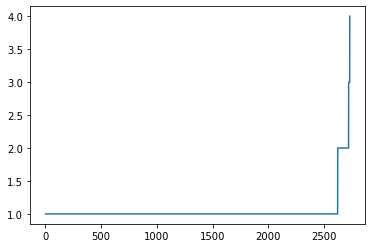

In [336]:
Graph.sort_values(by='Weight',inplace =True)
Graph.reset_index(drop = True, inplace = True)
Graph['Weight'].plot()

In [192]:
uniqueNodes = np.concatenate([np.unique(Graph.From.values),np.unique(Graph.To.values)])
uniqueNodes = np.unique(uniqueNodes)
len(uniqueNodes)

877